# Environment

In [4]:
import google.cloud.bigquery as bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsn
import numpy as np
import importlib

In [5]:
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    cohen_kappa_score,
)

In [6]:
import src.utils.evaluation as evaluation
import src.model.sklearn.trainer.model as sklearn_v1

In [7]:
import importlib
importlib.reload(evaluation)
importlib.reload(sklearn_v1)

<module 'src.model.sklearn.trainer.model' from '/home/fabien_tarrade/proj_NLP_text_classification_with_GCP/src/model/sklearn/trainer/model.py'>

# Data

In [8]:
query = sklearn_v1.create_queries()
df = sklearn_v1.query_to_dataframe(query)

In [9]:
len(df)

55848

In [10]:
df.head()

,label,text
id,,
28728142,c,newbie get expect expression error compile cod...
16905513,c,pic 18f46k22 mikroc try implement usart interr...
22348213,c,gcc attribute influence nested functionfunctio...
23095398,c,address truncationtry truncate start address l...
18675170,c,return value function return valuefunction ret...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55848 entries, 28728142 to 35042595
Data columns (total 2 columns):
label    55848 non-null object
text     55848 non-null object
dtypes: object(2)
memory usage: 1.3+ MB


In [12]:
df.columns

Index(['label', 'text'], dtype='object')

In [13]:
df['label'].unique()

array(['c', 'r', 'c#', 'c++', 'css', 'git', 'ios', 'php', 'sql', 'wpf',
       'xml', '.net', 'ajax', 'html', 'java', 'json', 'ruby', 'excel',
       'forms', 'html5', 'image', 'linux', 'mysql', 'regex', 'swift',
       'xcode', 'arrays', 'django', 'iphone', 'jquery', 'oracle',
       'python', 'spring', 'string', 'vb.net', 'android', 'asp.net',
       'eclipse', 'node.js', 'windows', 'database', 'facebook',
       'angularjs', 'wordpress', 'javascript', 'sql-server',
       'asp.net-mvc', 'objective-c', 'ruby-on-rails', 'multithreading'],
      dtype=object)

# Naive Bayes (Single-Label Classification)

In [14]:
train, test = sklearn_v1.create_dataframes(df)

TypeError: create_dataframes() takes 0 positional arguments but 1 was given

In [12]:
print(train.shape,test.shape)

(44678, 2) (11170, 2)


In [38]:
features, label=sklearn_v1.input_fn(df)

In [39]:
type(features),type(label)

(pandas.core.series.Series, pandas.core.series.Series)

In [40]:
features.head()

id
28728142    newbie get expect expression error compile cod...
16905513    pic 18f46k22 mikroc try implement usart interr...
22348213    gcc attribute influence nested functionfunctio...
23095398    address truncationtry truncate start address l...
18675170    return value function return valuefunction ret...
Name: text, dtype: object

In [ ]:
 Define a Pipeline
list_model = [(Pipeline([('Word Embedding', CountVectorizer()),
                             ('Clasifier', MultinomialNB(alpha=0.1))]),
                   'Multinomial Naive Bayes'),
                  (Pipeline([('Word Embedding', CountVectorizer()),
                             ('Feature Transform', TfidfTransformer()),
                             ('Clasifier', MultinomialNB(alpha=0.1))]),
                   'Naive Bayes with tfidf'),
                  (Pipeline([('Word Embedding', CountVectorizer(max_df=0.8, min_df=20)),
                             ('Feature Transform', TfidfTransformer()),
                             ('Clasifier', MultinomialNB(alpha=0.1))]),
                   'Naive Bayes tfidf diff_params'),
                  (Pipeline([('Word Embedding', CountVectorizer(max_df=0.8, min_df=20)),
                             ('Feature Transform', TfidfTransformer()),
                             ('Clasifier', SVC(C=10, gamma=0.1, kernel='linear'))]),
                   'SVC')]

In [20]:
p=Pipeline([('Word Embedding', CountVectorizer()),
            ('Feature Transform', TfidfTransformer()),
            ('Clasifier', MultinomialNB(alpha=0.1))])

In [29]:
p

Pipeline(memory=None,
         steps=[('Word Embedding',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Feature Transform',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Clasifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [41]:
type(features), type(label)

(pandas.core.series.Series, pandas.core.series.Series)

In [42]:
p.fit(features, label)

Pipeline(memory=None,
         steps=[('Word Embedding',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Feature Transform',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Clasifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [43]:
y_pred = p.predict(features)

In [16]:
sklearn_v1.train_and_evaluate()

accuracy on test set: 
 0.5224709042076991 % 

accuracy on train set: 
 0.6913693540444962 % 



Pipeline(memory=None,
         steps=[('Word Embedding',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Feature Transform',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Clasifier',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

In [443]:
estimators = [
    ('tfidf', TfidfVectorizer(tokenizer=lambda string: string.split())),
    ('clf', MultinomialNB()),
]
parameters = {
    'tfidf__min_df': np.arange(10, 30, 10),
    'tfidf__max_df': np.arange(0.75, 0.9, 0.05),
    'tfidf__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'clf__alpha': np.arange(0.2, 1, 0.2),
}

In [444]:
p = Pipeline(estimators)
grid = RandomizedSearchCV(p, param_distributions=parameters,
                           scoring='balanced_accuracy', n_iter=20, cv=3, n_jobs=-1)

In [445]:
score = grid.fit(x_train, y_train)

In [446]:
y_pred = grid.predict(x_test)

In [447]:
print(classification_report(y_test, y_pred))

/home/.conda-env/env_nlp_text_class/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                precision    recall  f1-score   support

          .net       0.00      0.00      0.00       106
          ajax       0.00      0.00      0.00        23
       android       0.76      0.86      0.81      1154
     angularjs       0.94      0.65      0.77       152
        arrays       0.00      0.00      0.00        37
       asp.net       0.67      0.27      0.38       168
   asp.net-mvc       0.61      0.12      0.21        89
             c       0.72      0.48      0.58       273
            c#       0.48      0.68      0.56       927
           c++       0.65      0.75      0.70       673
           css       0.67      0.54      0.59       168
      database       0.00      0.00      0.00        44
        django       0.98      0.40      0.57       100
       eclipse       1.00      0.02      0.04        56
         excel       0.82      0.67      0.74       133
      facebook       0.75      0.10      0.17        61
         forms       0.00      0.00      0.00  

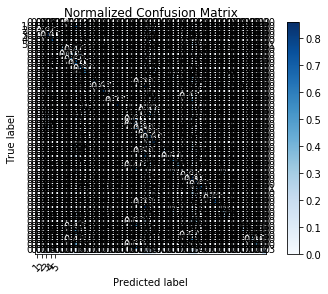

In [448]:
cm = confusion_matrix(y_test, y_pred)
evaluation.plot_confusion_matrix(cm=cm, classes=range(1, 6), normalize=True)

In [449]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Balanced accuracy:', balanced_accuracy_score(y_test, y_pred))
print("Cohen's cappa coefficient:", cohen_kappa_score(y_test, y_pred))

Accuracy: 0.6128021486123545
Balanced accuracy: 0.3166376476428201
Cohen's cappa coefficient: 0.5837824994206284


# Support Vector Machine (Single-Label Classification)

In [407]:
x2 = df['code_body'] + df['title']
y2 = df['tags'].apply(lambda row: ' '.join(row))

In [408]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, stratify=y2, random_state=30)

In [412]:
estimators2 = [
    ('tfidf', TfidfVectorizer(tokenizer=lambda string: string.split())),
    ('clf', SGDClassifier(n_jobs=-1))
]
parameters2 = {
    'tfidf__min_df': np.arange(10, 30, 10),
    'tfidf__max_df': np.arange(0.75, 0.9, 0.05),
    'tfidf__ngram_range': [(1, 1), (2, 2), (3, 3)],
    'clf__alpha': (1e-2, 1e-3)
}

In [419]:
p2 = Pipeline(estimators2)
grid2 = RandomizedSearchCV(p2, param_distributions=parameters2, 
                           scoring='balanced_accuracy', n_iter=20, cv=3, n_jobs=-1)

In [420]:
score2 = grid2.fit(x2_train, y2_train)

In [421]:
y2_pred = grid.predict(x2_test)

In [422]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

     android       0.89      0.87      0.88      1155
          c#       0.85      0.76      0.80       927
        java       0.81      0.86      0.83      1276
  javascript       0.86      0.82      0.84       685
         php       0.82      0.87      0.85       851

    accuracy                           0.84      4894
   macro avg       0.84      0.84      0.84      4894
weighted avg       0.84      0.84      0.84      4894



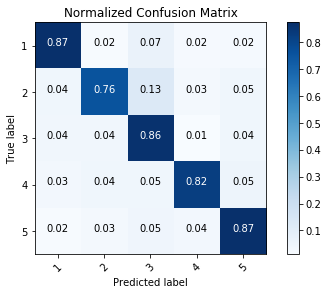

In [423]:
cm2 = confusion_matrix(y2_test, y2_pred)
evaluation.plot_confusion_matrix(cm=cm2, classes=range(1, 6), normalize=True)

In [424]:
print('Accuracy:', accuracy_score(y2_test, y2_pred))
print('Balanced accuracy:', balanced_accuracy_score(y2_test, y2_pred))
print("Cohen's cappa coefficient:", cohen_kappa_score(y2_test, y2_pred))

Accuracy: 0.8414384961176952
Balanced accuracy: 0.8377815927881562
Cohen's cappa coefficient: 0.7991165079546603


# Naive Bayes (Multi-Label Classification)

In [347]:
x2 = df["code_body"] + df["title"]
y2 = df["tags"].apply(lambda row: " ".join(row))

In [348]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, stratify=y, random_state=30)

In [374]:
estimators2 = [
    ("tfidf", TfidfVectorizer(tokenizer=lambda string: string.split())),
    ("clf", OneVsRestClassifier(MultinomialNB(), n_jobs=1)),
]
parameters2 = {
    "tfidf__min_df": np.arange(10, 30, 10),
    "tfidf__max_df": np.arange(0.75, 0.9, 0.05),
    "tfidf__ngram_range": [(1, 1), (2, 2), (3, 3)],
    "clf__estimator__alpha": np.arange(0.2, 1, 0.2),
}

In [377]:
p2 = Pipeline(estimators2)
grid2 = RandomizedSearchCV(
    p2, param_distributions=parameters2, n_iter=20, cv=3, n_jobs=-1
)

In [378]:
score2 = grid2.fit(x2_train, y2_train)

In [379]:
y2_pred = grid2.predict(x2_test)

In [380]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

     android       0.89      0.89      0.89      1155
          c#       0.85      0.75      0.80       927
        java       0.81      0.87      0.84      1276
  javascript       0.87      0.82      0.85       685
         php       0.83      0.88      0.86       851

    accuracy                           0.85      4894
   macro avg       0.85      0.84      0.85      4894
weighted avg       0.85      0.85      0.85      4894



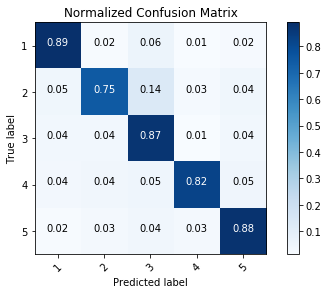

In [381]:
cm = confusion_matrix(y2_test, y2_pred)
evaluation.plot_confusion_matrix(cm=cm, classes=range(1, 6), normalize=True)

In [382]:
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Balanced accuracy:", balanced_accuracy_score(y2_test, y2_pred))
print("Cohen's Cappa Coefficient", cohen_kappa_score(y2_test, y2_pred))

Accuracy: 0.8475684511646915
Balanced accuracy: 0.8428282590127865
Cohen's Cappa Coefficient 0.8067754684733933


# Support Vector Machine (Multi-Label Classification)

In [24]:
x2 = df["code_body"]
y2 = MultiLabelBinarizer().fit_transform(df["tags"].tolist())

In [25]:
x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.2, random_state=30
)

In [26]:
estimators = [
    ("tfidf", TfidfVectorizer(tokenizer=lambda string: string.split())),
    ("clf", OneVsRestClassifier(SGDClassifier(n_jobs=-1), n_jobs=-1)),
]
parameters = {
    "tfidf__min_df": np.arange(0.01, 0.05, 0.01),
    "tfidf__max_df": np.arange(0.75, 0.9, 0.05),
    "tfidf__ngram_range": [(1, 1), (2, 2), (3, 3)],
    "clf__estimator__alpha": (1e-2, 1e-3),
}

In [29]:
p2 = Pipeline(estimators)
grid2 = RandomizedSearchCV(
    p, param_distributions=parameters, n_iter=20, cv=3, scoring="roc_auc", n_jobs=-1
)

In [30]:
score2 = grid.fit(x2_train, y2_train)

In [31]:
y2_pred = grid.predict(x_test)

In [ ]:
print(classification_report(y2_test, y2_pred))
print(accuracy_score(y2_test, y2_pred))

# Training on GCP using AI Platform training

## Training locally

In [3]:
%%bash
export PYTHONPATH=${PYTHONPATH}:${PYTHONPATH}/src/model/sklearn/

python -m trainer.task \
--job-dir gs://${BUCKET_NAME}/stackoverflow/sklearn \
--project_id $PROJECT_ID \
--frac 0.001

{'eval_size': 20.0, 'frac': 0.001, 'WE_max_df': 1.0, 'WE_min_df': 1, 'FT_norm': 'l2', 'M_alpha': 1.0, 'project_id': 'nlp-text-classification', 'job_dir': 'gs://nlp-text-classification/stackoverflow/sklearn'}
size of the training set  : 24720
size of the evaluation set: 6263
<class 'pandas.core.frame.DataFrame'>
Index: 24720 entries, 3144485 to 5432321
Data columns (total 2 columns):
label    24720 non-null object
text     24720 non-null object
dtypes: object(2)
memory usage: 17.3 MB
None
### CPU (count) 2
### CPU (count) 1
### CPU (count) 2
svmem(total=8375939072, available=7338971136, percent=12.4, used=766574592, free=6777360384, active=1151614976, inactive=298704896, buffers=86614016, cached=745390080, shared=10641408, slab=90595328)
### Memory total     7.80 Gb
### Memory percent   12.40 %
### Memory available 6.83 Gb
### Memory used      0.71 Gb
### Memory free      6.31 Gb
### Memory active    1.07 Gb
### Memory inactive  0.28 Gb
### Memory buffers   0.08 Gb
### Memory cached    

Copying file://model.joblib [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

- [1 files][  1.8 GiB/  1.8 GiB]   70.2 MiB/s                                   
Operation completed over 1 objects/1.8 GiB.                                      


In [3]:
%%bash
export PYTHONPATH=${PYTHONPATH}:${PYTHONPATH}/src/model/sklearn/

python -m trainer.task \
--job-dir gs://${BUCKET_NAME}/stackoverflow/sklearn \
--project_id $PROJECT_ID \
--frac 0.001 \
--WE_min_df 1 \
--WE_max_df 1.0 \
--FT_norm 'l2' \
--M_alpha 0.56218373775482178 

{'eval_size': 20.0, 'frac': 0.001, 'WE_max_df': 1.0, 'WE_min_df': 1.0, 'FT_norm': 'l2', 'M_alpha': 0.5621837377548218, 'project_id': 'nlp-text-classification', 'job_dir': 'gs://nlp-text-classification/stackoverflow/sklearn'}
size of the training set  : 24794
size of the evaluation set: 6322
<class 'pandas.core.frame.DataFrame'>
Index: 24794 entries, 9921997 to 11567640
Data columns (total 2 columns):
label    24794 non-null object
text     24794 non-null object
dtypes: object(2)
memory usage: 17.4 MB
None
### CPU (count) 8
### CPU (count) 4
### CPU (count) 8
svmem(total=67565072384, available=66013839360, percent=2.3, used=863461376, free=63737524224, active=1110327296, inactive=2344775680, buffers=87523328, cached=2876563456, shared=10686464, slab=168321024)
### Memory total     62.92 Gb
### Memory percent   2.30 %
### Memory available 61.48 Gb
### Memory used      0.80 Gb
### Memory free      59.36 Gb
### Memory active    1.03 Gb
### Memory inactive  2.18 Gb
### Memory buffers   0.08

Copying file://model.joblib [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run          
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on composite objects is
so slow that gsutil disables downloads of composite objects.

/ [1 files][  1.8 GiB/  1.8 GiB]   82.0 MiB/s                                   
Operation completed over 1 objects/1.8 GiB.                                      


## Training using AI Platform training

In [4]:
%%bash

RUNTIME_VERSION="1.14"
PYTHON_VERSION="3.5"
JOB_DIR="gs://${BUCKET_NAME}/stackoverflow/sklearn/${JOBNAME}"
JOB_NAME=stackoverflow_sklearn_$(date +"%Y%m%d_%H%M%S")
CONFIG="$DIR_PROJ/deployment/training/sklearn/custom.yaml"
gcloud ai-platform jobs submit training $JOB_NAME \
  --job-dir $JOB_DIR \
  --package-path $DIR_PROJ/src/model/sklearn/trainer \
  --module-name trainer.task \
  --region us-central1 \
  --runtime-version=$RUNTIME_VERSION \
  --python-version=$PYTHON_VERSION \
  --config $CONFIG \
  -- \
  --project_id $PROJECT_ID \
  --frac 0.001

jobId: stackoverflow_sklearn_20191206_083756
state: QUEUED


Job [stackoverflow_sklearn_20191206_083756] submitted successfully.
Your job is still active. You may view the status of your job with the command

  $ gcloud ai-platform jobs describe stackoverflow_sklearn_20191206_083756

or continue streaming the logs with the command

  $ gcloud ai-platform jobs stream-logs stackoverflow_sklearn_20191206_083756


In [ ]:
%%bash
gcloud ai-platform jobs stream-logs $JOB_NAME

## Training and hyper-parameters using AI Platform training

In [1]:
%%bash

RUNTIME_VERSION="1.14"
PYTHON_VERSION="3.5"
SCALE_TIER=STANDARD_1
REGION="us-central1"
JOB_NAME=stackoverflow_sklearn_$(date +"%Y%m%d_%H%M%S")
JOB_DIR="gs://${BUCKET_NAME}/stackoverflow/sklearn/${JOBNAME}"
HPTUNING_CONFIG="$DIR_PROJ/deployment/hp-tuning/sklearn/hyperparam.yaml"
TRAINER_PACKAGE_PATH="$DIR_PROJ/src/model/sklearn/trainer"
MAIN_TRAINER_MODULE="trainer.task"

gcloud ai-platform jobs submit training $JOB_NAME \
  --job-dir $JOB_DIR \
  --package-path $TRAINER_PACKAGE_PATH \
  --module-name $MAIN_TRAINER_MODULE \
  --region $REGION \
  --runtime-version=$RUNTIME_VERSION \
  --python-version=$PYTHON_VERSION \
  --scale-tier $SCALE_TIER \
  --config $HPTUNING_CONFIG \
  -- \
  --project_id $PROJECT_ID
  --frac 0.001

jobId: stackoverflow_sklearn_20191204_113540
state: QUEUED


Job [stackoverflow_sklearn_20191204_113540] submitted successfully.
Your job is still active. You may view the status of your job with the command

  $ gcloud ai-platform jobs describe stackoverflow_sklearn_20191204_113540

or continue streaming the logs with the command

  $ gcloud ai-platform jobs stream-logs stackoverflow_sklearn_20191204_113540


## Testing local CPU and memory usage

In [1]:
import psutil

print('### CPU (count) {}'.format(psutil.cpu_count()))
print('### CPU (count) {}'.format(psutil.cpu_count(logical=False)))
print('### CPU (count) {}'.format(len(psutil.Process().cpu_affinity())))

mem = psutil.virtual_memory()
print('----> memory  ...')
print(mem) 
print('### Memory total     {:.2f} Gb'.format(mem.total/1024**3))
print('### Memory percent   {:.2f} %'.format(mem.percent))
print('### Memory available {:.2f} Gb'.format(mem.available/1024**3))
print('### Memory used      {:.2f} Gb'.format(mem.used/1024**3))
print('### Memory free      {:.2f} Gb'.format(mem.free/1024**3))
print('### Memory active    {:.2f} Gb'.format(mem.active/1024**3))
print('### Memory inactive  {:.2f} Gb'.format(mem.inactive/1024**3))
print('### Memory buffers   {:.2f} Gb'.format(mem.buffers/1024**3))      
print('### Memory cached    {:.2f} Gb'.format(mem.cached/1024**3))    
print('### Memory shared    {:.2f} Gb'.format(mem.shared/1024**3))   
print('### Memory slab      {:.2f} Gb'.format(mem.slab/1024**3)) 
print(' ')

### CPU (count) 8
### CPU (count) 4
### CPU (count) 8
----> memory  ...
svmem(total=67565072384, available=66080075776, percent=2.2, used=827867136, free=65787101184, active=968855552, inactive=508661760, buffers=91209728, cached=858894336, shared=10686464, slab=105308160)
### Memory total     62.92 Gb
### Memory percent   2.20 %
### Memory available 61.54 Gb
### Memory used      0.77 Gb
### Memory free      61.27 Gb
### Memory active    0.90 Gb
### Memory inactive  0.47 Gb
### Memory buffers   0.08 Gb
### Memory cached    0.80 Gb
### Memory shared    0.01 Gb
### Memory slab      0.10 Gb
 
